# Module 4 Data Clustering K-Means 

- K-means

Libraries used:

- matplotlib.pyplot


### There are 20 points in this demo like the following

In [1]:
points = [[52, 28],[25, 95], [36, 64],[20, 94],[52, 27],[20, 96],[39, 65],[34, 90],[75, 15], [74, 21],
          [90, 43], [60, 12], [67, 20], [30, 92], [61, 31], [8, 74], [51, 32],[64, 41], [15, 80], 
          [9, 80]]

### Get the X and Y point values

- used for visualization
- utility functions are listed below

In [2]:
def get_X(P):
    r = []
    for x in P:
        r.append(x[0])
    return r

def get_Y(P):
    r = []
    for x in P:
        r.append(x[1])
    return r

### Visualize the points

In [3]:
import matplotlib.pyplot as plot

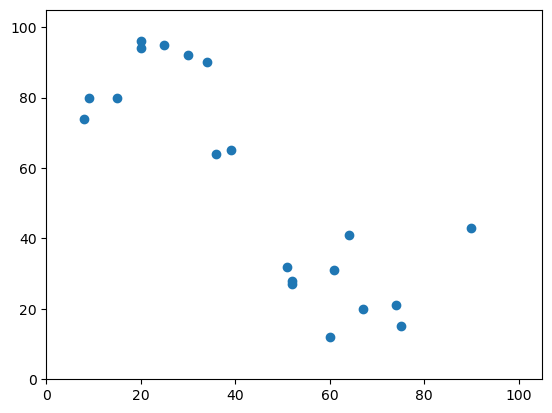

In [4]:
%matplotlib inline

plot.ylim([0,105])
plot.xlim([0,105])

X = get_X(points)
Y = get_Y(points)

plot.scatter(X, Y)

plot.show()

### Assume K = 2

- Two clusters
- the two initial centroids are selected for illustration purpose. 
- Use **random.randint()** for random selection

**Note:** The example below does not use the **random.randint()** function the example used two manually chosen points.

In [5]:
centroid_1 = points[13]

centroid_2 = points[18]

### Plot the points

- show the **centroids**

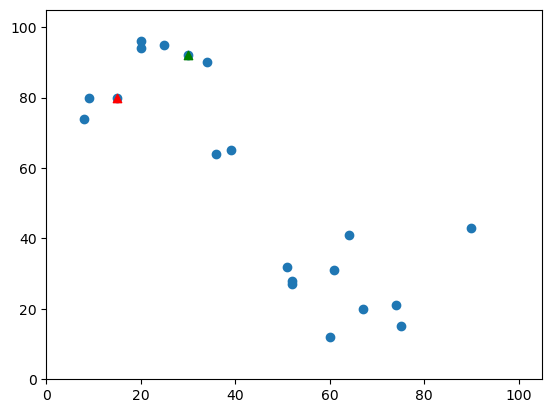

In [6]:
X = get_X(points)
Y = get_Y(points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y)

X = get_X([centroid_1])
Y = get_Y([centroid_1])

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green", marker="^")

X = get_X([centroid_2])
Y = get_Y([centroid_2])

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red", marker="^")

plot.show()

## Using the Manhattan distance

In [7]:
import math

### Method to calcuate the **Manhattan Distance**.

In [8]:
def distance(p, q):
    
    return int(math.fabs(p[0] - q[0]) + math.fabs(p[1]-q[1]))

### These will be used to store points in each cluster (index only)

In [9]:
cluster_1 = []

cluster_2 = []

###  Assign points to each cluster by the distance; clustering

In [10]:
for i in range(len(points)):
    
    if (distance(points[i], centroid_1) < distance(points[i], centroid_2)):
        cluster_1.append(i)
    else:
        cluster_2.append(i)

### Check results

In [11]:
cluster_1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]

In [12]:
len(cluster_1)

17

In [13]:
cluster_2

[15, 18, 19]

In [14]:
len(cluster_2)

3

### Visualize clusters

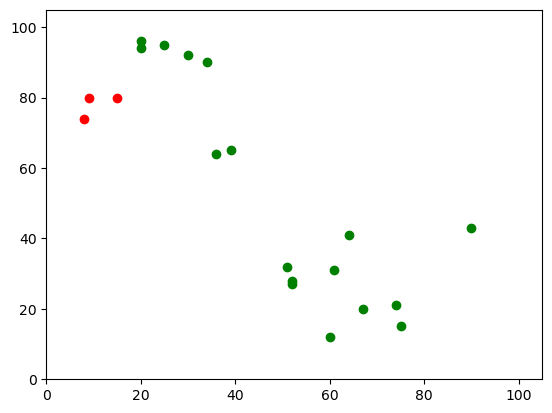

In [15]:
cluster_points = []

for x in cluster_1:
    cluster_points.append(points[x])

X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_points = []

for x in cluster_2:
    cluster_points.append(points[x])

X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

plot.show()

### SSE - Sum of Squared Error is used for clustering evaluation

- method to calculate the **Sum of Squared Error** 

In [16]:
def SSE (center, cluster):
    
    sum = 0
    
    for p in cluster:
        d = distance(center, p)
        sum = sum + d * d
    
    return sum

# SSE of cluster_1

- calculate the SSE of cluster 1

In [17]:
cluster_points = []

for x in cluster_1:
    cluster_points.append(points[x])
    
print(SSE(centroid_1, cluster_points))

104078


# SSE of cluster_2

- calculate the SSE of cluster 2

In [18]:
cluster_points = []

for x in cluster_2:
    cluster_points.append(points[x])
    
print(SSE(centroid_2, cluster_points))

205


### Time to recompute the centroids

- do **not** forget to store the "old" centroids; will use them to terminate the algorithm
- method to recompute the new centroid

In [19]:
def new_centroid(p):
    
    sum_of_x = 0
    
    sum_of_y = 0
    
    for i in range(len(p)):
        sum_of_x = points[p[i]][0] + sum_of_x
    for i in range(len(p)):
        sum_of_y = points[p[i]][1] + sum_of_y
    return int(sum_of_x/len(p)), int(sum_of_y/len(p))

In [20]:
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2

centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)

In [21]:
print(old_centroid_1 == centroid_1)

print(old_centroid_2 == centroid_2)

False
False


### Re-assign the points to a cluster

- using the new centroids that were found previously

In [22]:
cluster_1 = []
cluster_2 = []

for i in range(len(points)):
    
    if (distance(points[i], centroid_1) < distance(points[i], centroid_2)):
        cluster_1.append(i)
    else:
        cluster_2.append(i)

### Visualize the current clusters

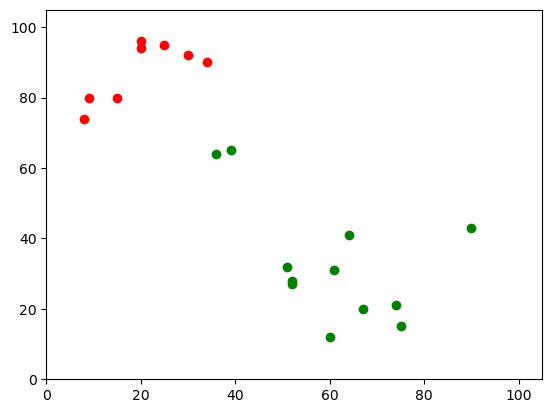

In [23]:
cluster_points = []

for x in cluster_1:
    cluster_points.append(points[x])
    
X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_points = []

for x in cluster_2:
    cluster_points.append(points[x])
    
X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

plot.show()

### Recompute the centroids

In [24]:
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2

centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)

In [25]:
print(old_centroid_1 == centroid_1)

print(old_centroid_2 == centroid_2)

False
False


In [26]:
cluster_1 = []
cluster_2 = []

for i in range(len(points)):
    if (distance(points[i], centroid_1) < distance(points[i], centroid_2)):
        cluster_1.append(i)
    else:
        cluster_2.append(i)

In [27]:
### Visualize clusters

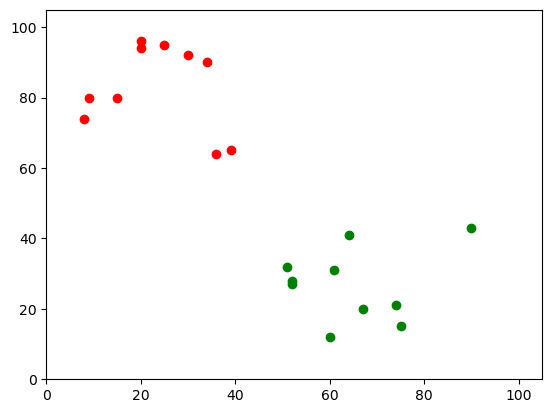

In [28]:
cluster_points = []

for x in cluster_1:
    cluster_points.append(points[x])
    
X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_points = []

for x in cluster_2:
    cluster_points.append(points[x])
    
X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

plot.show()

### Recompute the centroids

In [29]:
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2

centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)

In [30]:
print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)

False
False


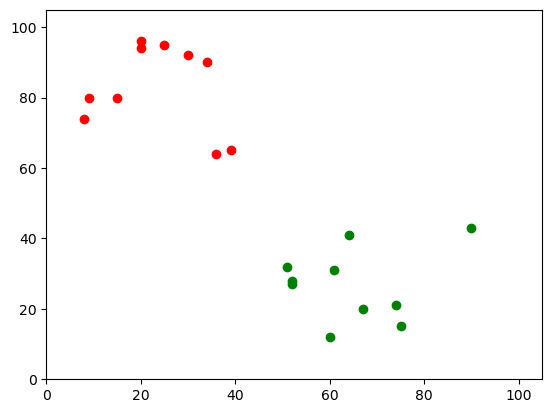

In [31]:
cluster_points = []

for x in cluster_1:
    cluster_points.append(points[x])
    
X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_points = []

for x in cluster_2:
    cluster_points.append(points[x])
    
X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

plot.show()

In [32]:
old_centroid_1 = centroid_1
old_centroid_2 = centroid_2

centroid_1 = new_centroid(cluster_1)
centroid_2 = new_centroid(cluster_2)

In [33]:
print(old_centroid_1 == centroid_1)
print(old_centroid_2 == centroid_2)

True
True


#### Since the centroids are not updated anymore, we will stop. Notice we only did 4 loop.

In [34]:
cluster_1

[0, 4, 8, 9, 10, 11, 12, 14, 16, 17]

In [35]:
cluster_2

[1, 2, 3, 5, 6, 7, 13, 15, 18, 19]

### SSE of cluster_1

- final

In [36]:
cluster_points = []

for x in cluster_1:
    cluster_points.append(points[x])
    
SSE(centroid_1, cluster_points)

3892

### SSE of cluster_2; 
- final

In [37]:
cluster_points = []

for x in cluster_2:
    cluster_points.append(points[x])

SSE(centroid_2, cluster_points)

4394

### Notice the SSE is much smaller than the SSE in the first loop

### See the final centroids. Are they in the centers of each cluster?

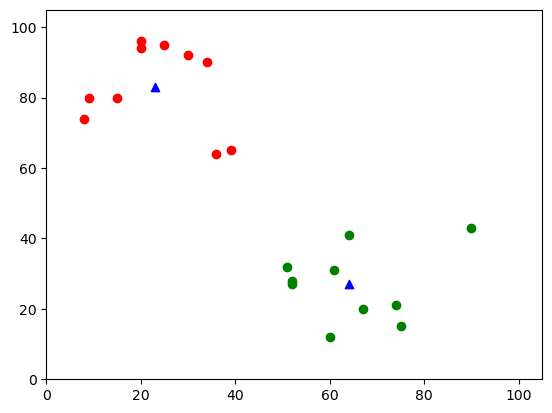

In [38]:
cluster_points = []

for x in cluster_1:
    cluster_points.append(points[x])
    
X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="green")

cluster_points = []

for x in cluster_2:
    cluster_points.append(points[x])
    
X = get_X(cluster_points)
Y = get_Y(cluster_points)

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="red")

X = get_X([centroid_1])
Y = get_Y([centroid_1])

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="blue", marker="^")

X = get_X([centroid_2])
Y = get_Y([centroid_2])

plot.ylim([0,105])
plot.xlim([0,105])
plot.scatter(X, Y, color="blue", marker="^")

plot.show()